# Dairy Goods Sales Dataset

A comprehensive dataset on dairy farms, products, sales, and inventory tracking.

# About Dataset

The Dairy Goods Sales Dataset provides a detailed and comprehensive collection of data related to dairy farms, dairy products, sales, and inventory management. This dataset encompasses a wide range of information, including farm location, land area, cow population, farm size, production dates, product details, brand information, quantities, pricing, shelf life, storage conditions, expiration dates, sales information, customer locations, sales channels, stock quantities, stock thresholds, and reorder quantities.

Features:
- Location: The geographical location of the dairy farm.
- Total Land Area (acres): The total land area occupied by the dairy farm.
- Number of Cows: The number of cows present in the dairy farm.
- Farm Size: The size of the dairy farm(in sq.km).
- Date: The date of data recording.
- Product ID: The unique identifier for each dairy product.
- Product Name: The name of the dairy product.
- Brand: The brand associated with the dairy product.
- Quantity (liters/kg): The quantity of the dairy product available.
- Price per Unit: The price per unit of the dairy product.
- Total Value: The total value of the available quantity of the dairy product.
- Shelf Life (days): The shelf life of the dairy product in days.
- Storage Condition: The recommended storage condition for the dairy product.
- Production Date: The date of production for the dairy product.
- Expiration Date: The date of expiration for the dairy product.
- Quantity Sold (liters/kg): The quantity of the dairy product sold.
- Price per Unit (sold): The price per unit at which the dairy product was sold.
- Approx. Total Revenue (INR): The approximate total revenue generated from the sale of the dairy product.
- Customer Location: The location of the customer who purchased the dairy product.
- Sales Channel: The channel through which the dairy product was sold (Retail, Wholesale, Online).
- Quantity in Stock (liters/kg): The quantity of the dairy product remaining in stock.
- Minimum Stock Threshold (liters/kg): The minimum stock threshold for the dairy product.
- Reorder Quantity (liters/kg): The recommended quantity to reorder for the dairy product.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import shap

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_boston
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor


sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('dairy_dataset.csv')
df.head()

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,Total Value,Shelf Life (days),Storage Condition,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,Telangana,310.84,96,Medium,2022-02-17,5,Ice Cream,Dodla Dairy,222.40,85.72,19064.1280,25,Frozen,2021-12-27,2022-01-21,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
1,Uttar Pradesh,19.19,44,Large,2021-12-01,1,Milk,Amul,687.48,42.61,29293.5228,22,Tetra Pack,2021-10-03,2021-10-25,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10
2,Tamil Nadu,581.69,24,Medium,2022-02-28,4,Yogurt,Dodla Dairy,503.48,36.50,18377.0200,30,Refrigerated,2022-01-14,2022-02-13,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83
3,Telangana,908.00,89,Small,2019-06-09,3,Cheese,Britannia Industries,823.36,26.52,21835.5072,72,Frozen,2019-05-15,2019-07-26,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68
4,Maharashtra,861.95,21,Medium,2020-12-14,8,Buttermilk,Mother Dairy,147.77,83.85,12390.5145,11,Refrigerated,2020-10-17,2020-10-28,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40


# Data Preprocessing Part 1

In [ ]:
#Check the number of unique value from all of the object datatype
df.select_dtypes(include='object').nunique()

Location               15
Farm Size               3
Date                 1278
Product Name           10
Brand                  11
Storage Condition       5
Production Date      1405
Expiration Date      1441
Customer Location      15
Sales Channel           3
dtype: int64

In [ ]:
# Remove Date and Expiration Date, but keep Production Date for Exploratory Data Analysis
df.drop(columns=['Date', 'Expiration Date'], inplace=True)
df.head()

,Location,Total Land Area (acres),Number of Cows,Farm Size,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,Total Value,Shelf Life (days),Storage Condition,Production Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,Telangana,310.84,96,Medium,5,Ice Cream,Dodla Dairy,222.40,85.72,19064.1280,25,Frozen,2021-12-27,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
1,Uttar Pradesh,19.19,44,Large,1,Milk,Amul,687.48,42.61,29293.5228,22,Tetra Pack,2021-10-03,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10
2,Tamil Nadu,581.69,24,Medium,4,Yogurt,Dodla Dairy,503.48,36.50,18377.0200,30,Refrigerated,2022-01-14,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83
3,Telangana,908.00,89,Small,3,Cheese,Britannia Industries,823.36,26.52,21835.5072,72,Frozen,2019-05-15,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68
4,Maharashtra,861.95,21,Medium,8,Buttermilk,Mother Dairy,147.77,83.85,12390.5145,11,Refrigerated,2020-10-17,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40


In [ ]:
# Convert 'date' column to datetime
df['Production Date'] = pd.to_datetime(df['Production Date'])

# Exploratory Data Analysis

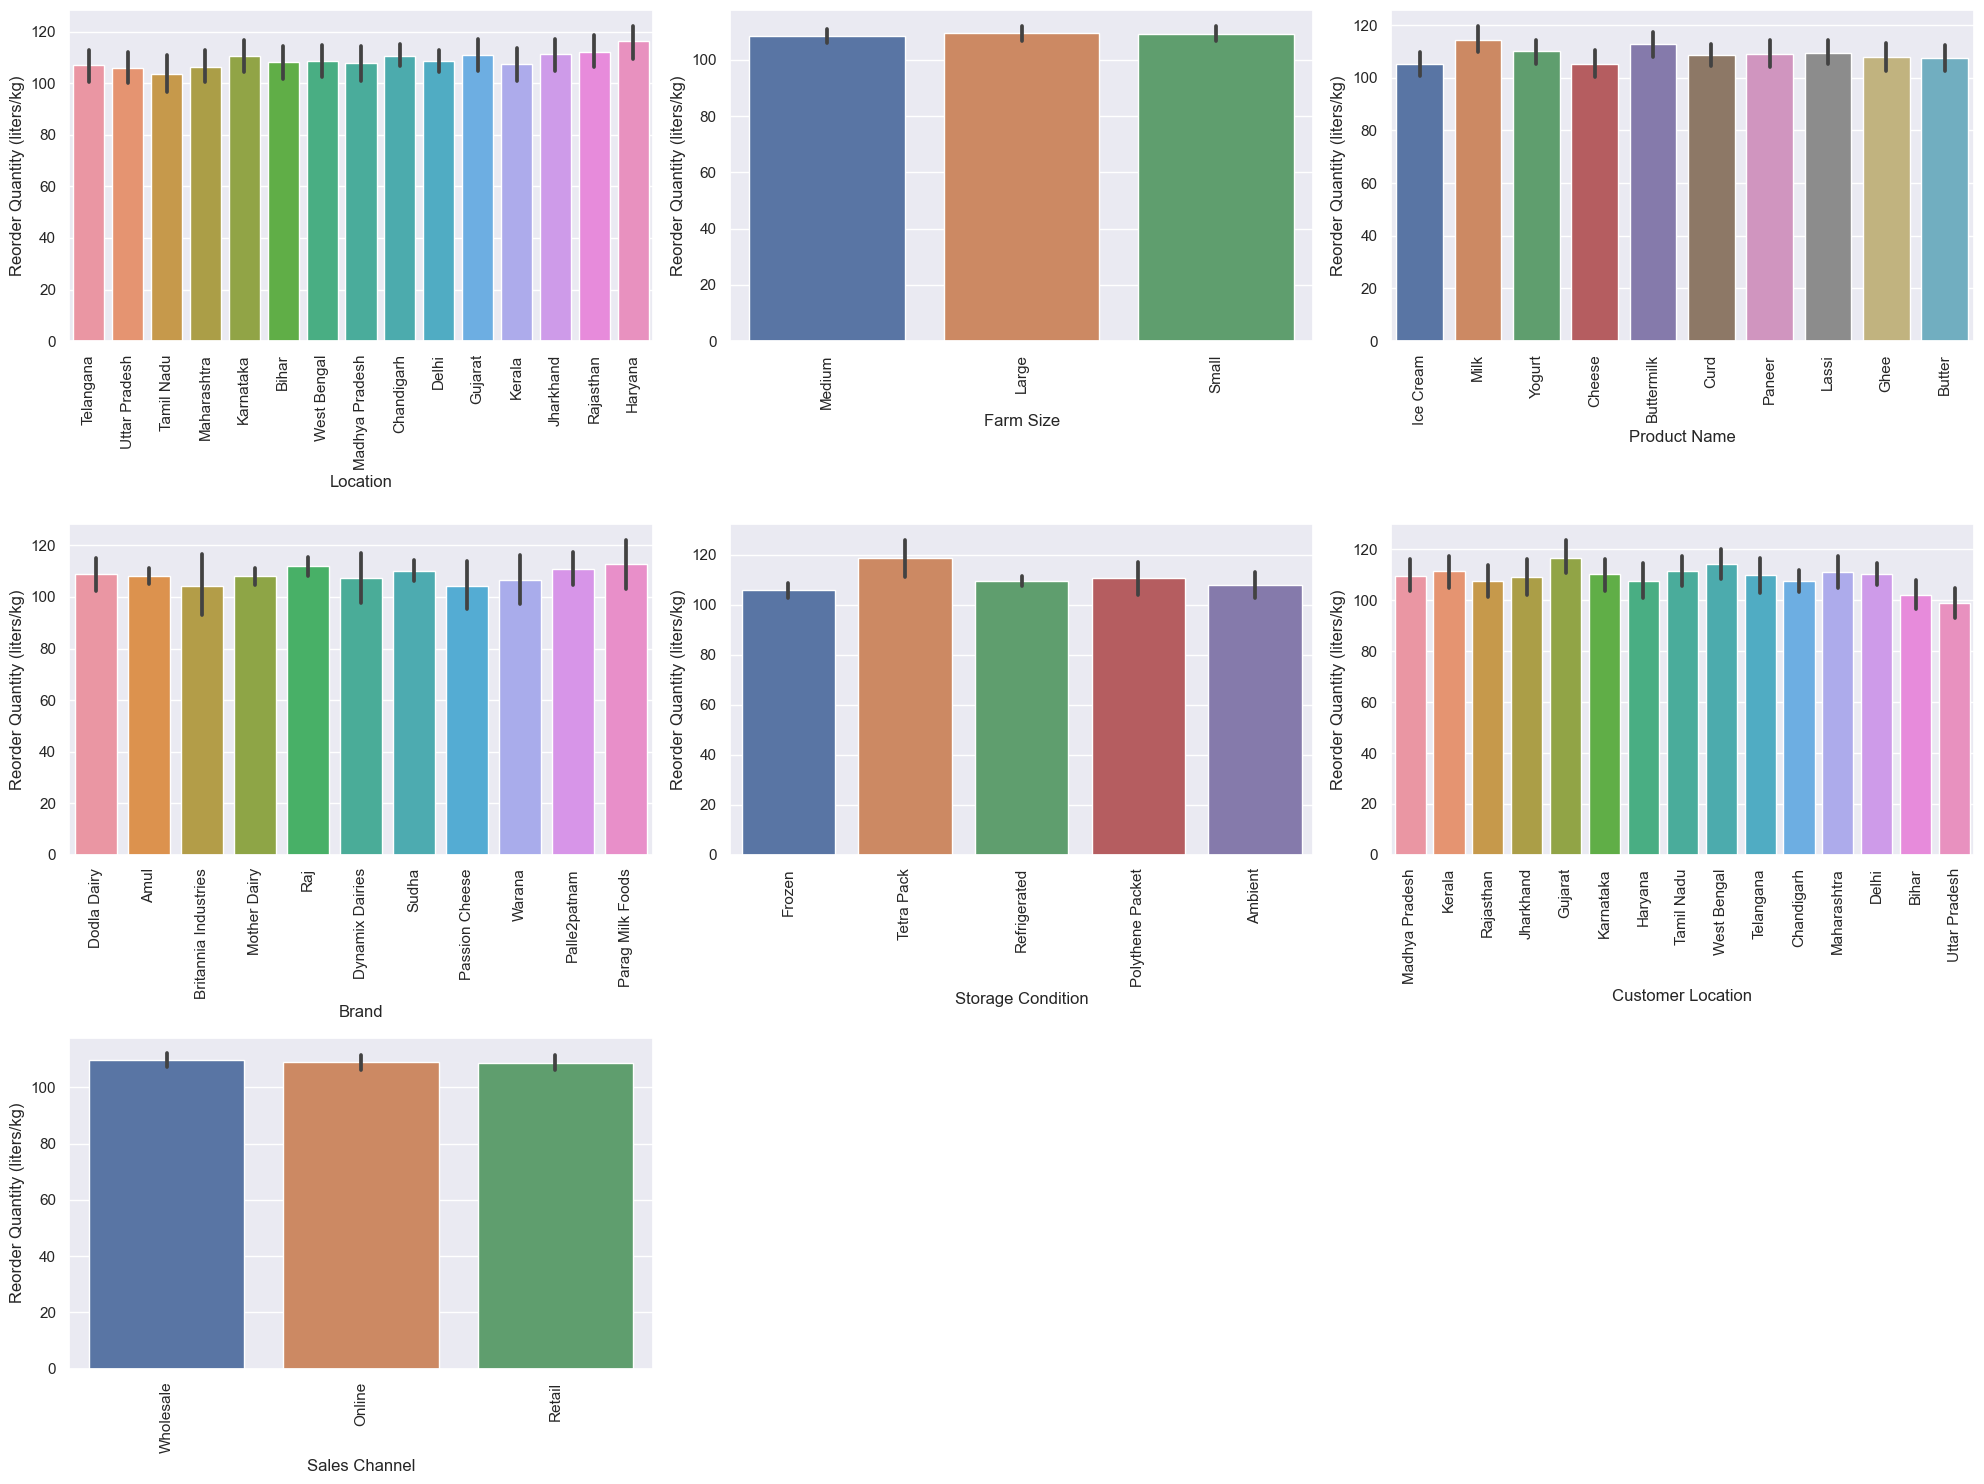

In [ ]:
# list of categorical variables to plot
cat_vars = ['Location', 'Farm Size', 'Product Name',
            'Brand', 'Storage Condition', 'Customer Location',
            'Sales Channel']

# create figure with subplots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.barplot(x=var, y='Reorder Quantity (liters/kg)', data=df, ax=axs[i], estimator=np.mean)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# remove the eigth subplot
fig.delaxes(axs[7])

# remove the ninth subplot
fig.delaxes(axs[8])

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

C:\Users\Michael\AppData\Local\Temp\ipykernel_14992\2486016364.py:21: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cat_counts = cat_counts_top.append(cat_counts_other)
C:\Users\Michael\AppData\Local\Temp\ipykernel_14992\2486016364.py:21: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cat_counts = cat_counts_top.append(cat_counts_other)
C:\Users\Michael\AppData\Local\Temp\ipykernel_14992\2486016364.py:21: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cat_counts = cat_counts_top.append(cat_counts_other)
C:\Users\Michael\AppData\Local\Temp\ipykernel_14992\2486016364.py:21: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cat_counts = cat_

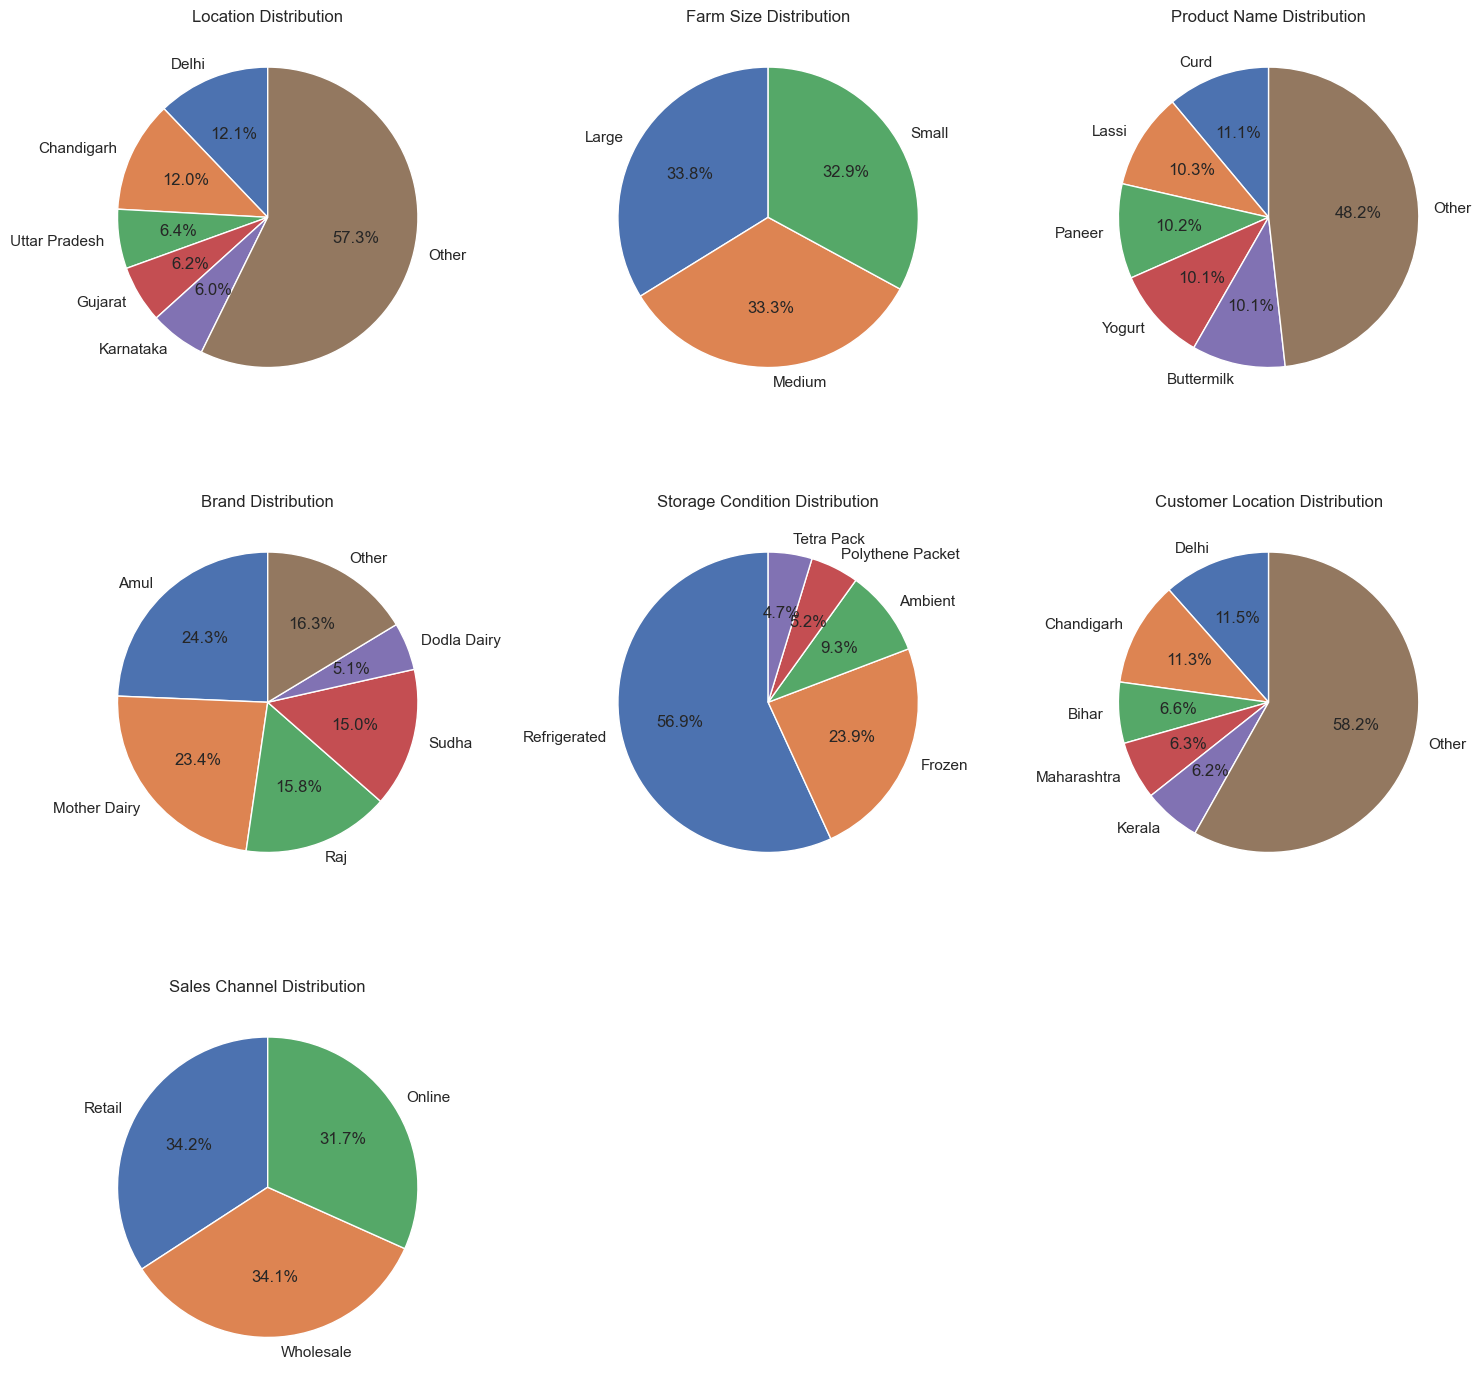

In [ ]:
# Specify the maximum number of categories to show individually
max_categories = 5

cat_vars = ['Location', 'Farm Size', 'Product Name',
            'Brand', 'Storage Condition', 'Customer Location',
            'Sales Channel']

# Create a figure and axes
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Create a pie chart for each categorical variable
for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        # Count the number of occurrences for each category
        cat_counts = df[var].value_counts()

        # Group categories beyond the top max_categories as 'Other'
        if len(cat_counts) > max_categories:
            cat_counts_top = cat_counts[:max_categories]
            cat_counts_other = pd.Series(cat_counts[max_categories:].sum(), index=['Other'])
            cat_counts = cat_counts_top.append(cat_counts_other)

        # Create a pie chart
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)

        # Set a title for each subplot
        axs.flat[i].set_title(f'{var} Distribution')

# Adjust spacing between subplots
fig.tight_layout()

# remove eigth plot
fig.delaxes(axs[2][1])

# remove ninth plot
fig.delaxes(axs[2][2])

# Show the plot
plt.show()

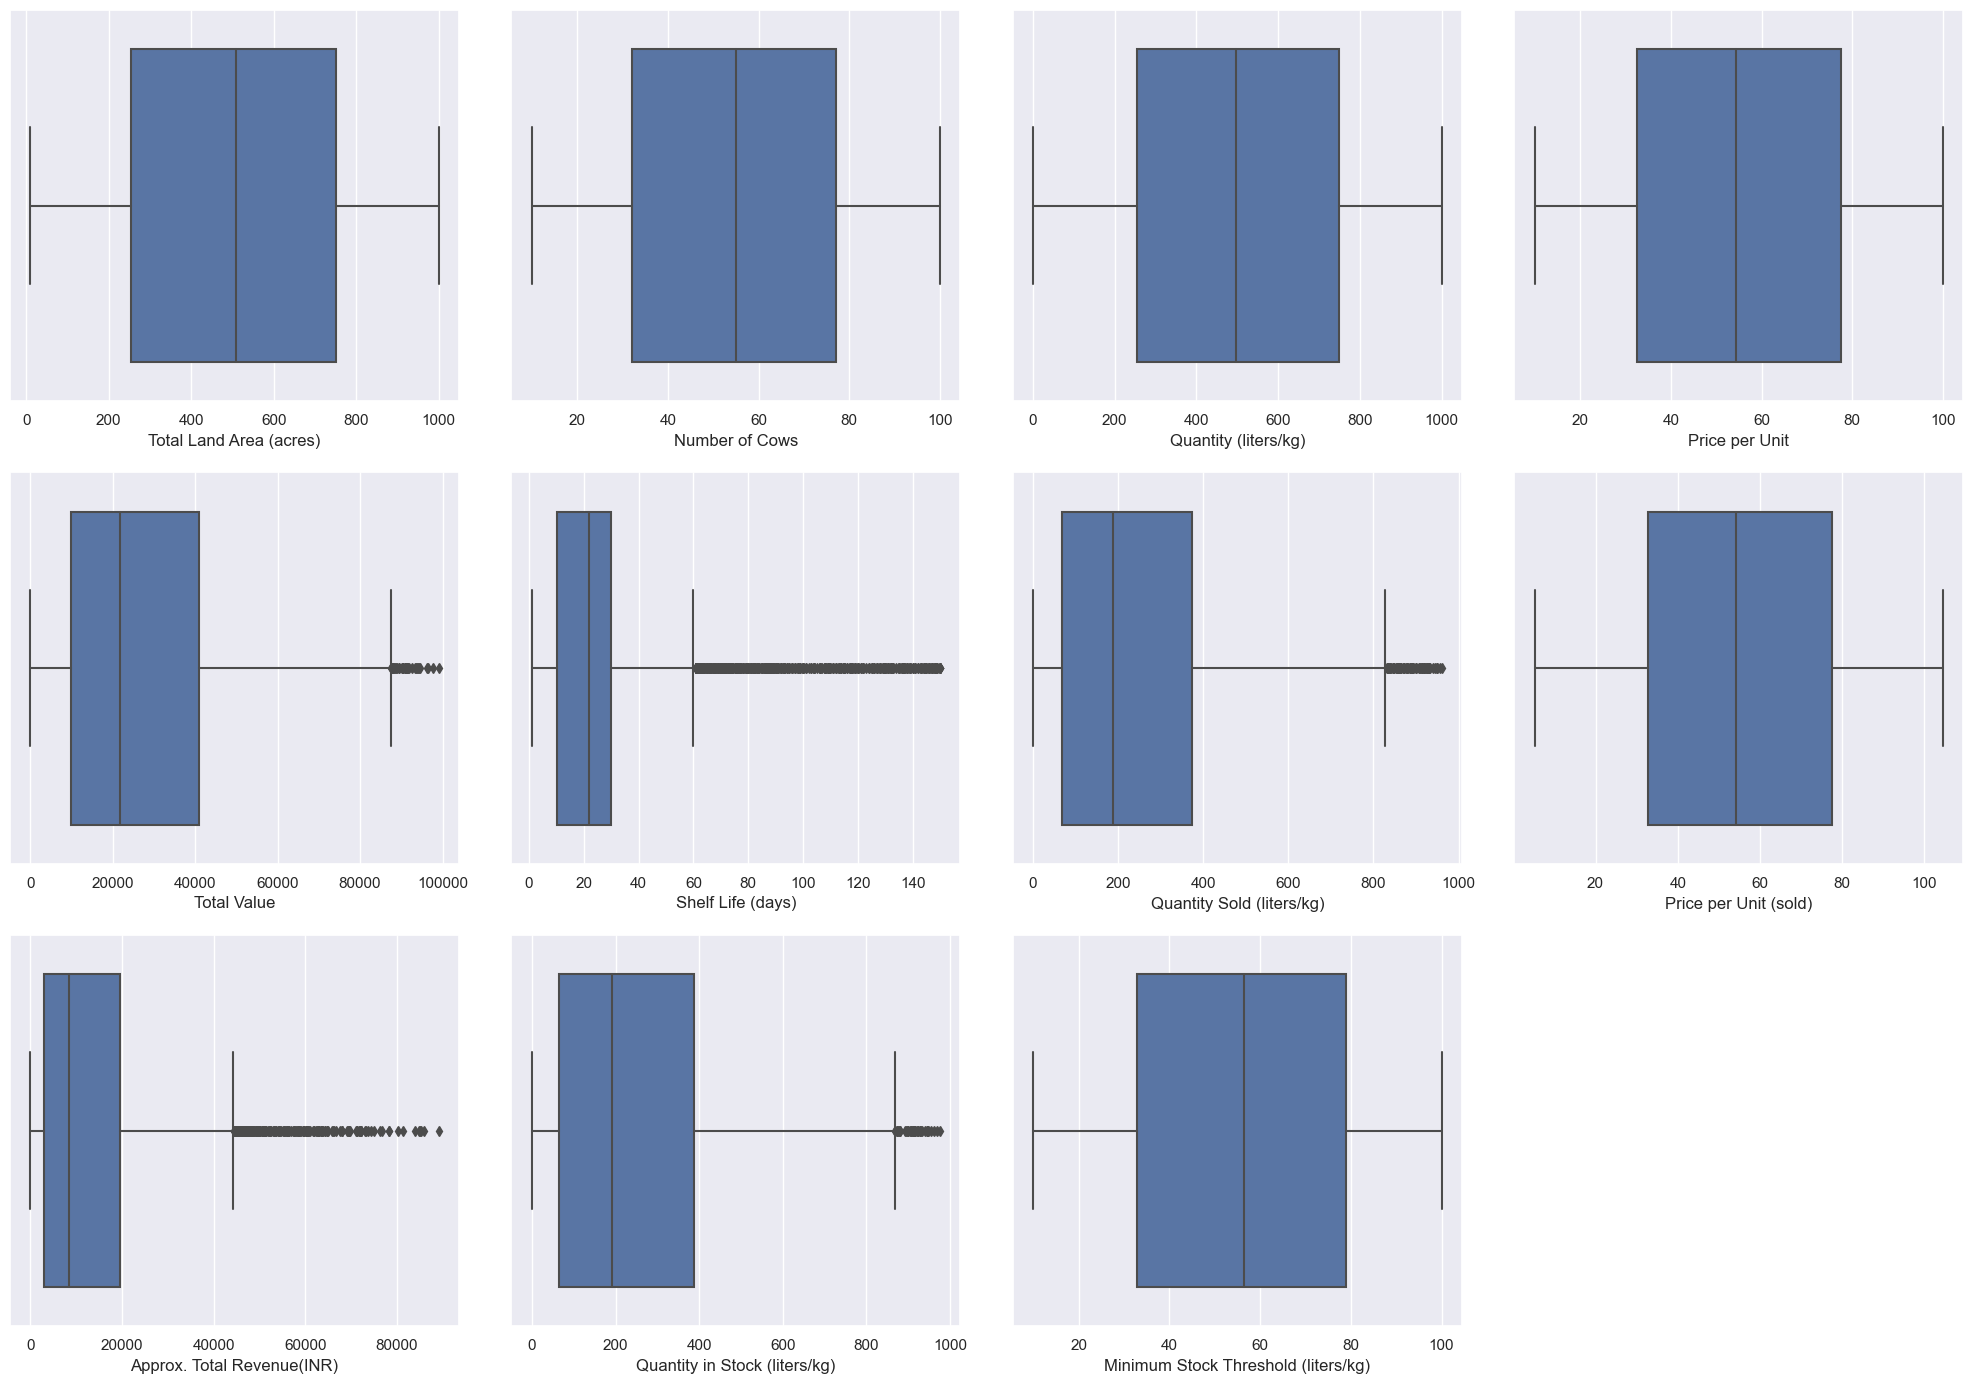

In [ ]:
# list of numerical variables to plot
num_vars = ['Total Land Area (acres)', 'Number of Cows', 'Quantity (liters/kg)', 'Price per Unit',
            'Total Value', 'Shelf Life (days)', 'Quantity Sold (liters/kg)', 'Price per Unit (sold)',
            'Approx. Total Revenue(INR)', 'Quantity in Stock (liters/kg)', 'Minimum Stock Threshold (liters/kg)']

# create figure with subplots
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20, 14))
axs = axs.flatten()

# create violinplot for each numerical variable
for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])

# adjust spacing between subplots
fig.tight_layout()

# remove the 12th subplot
fig.delaxes(axs[11])

plt.show()

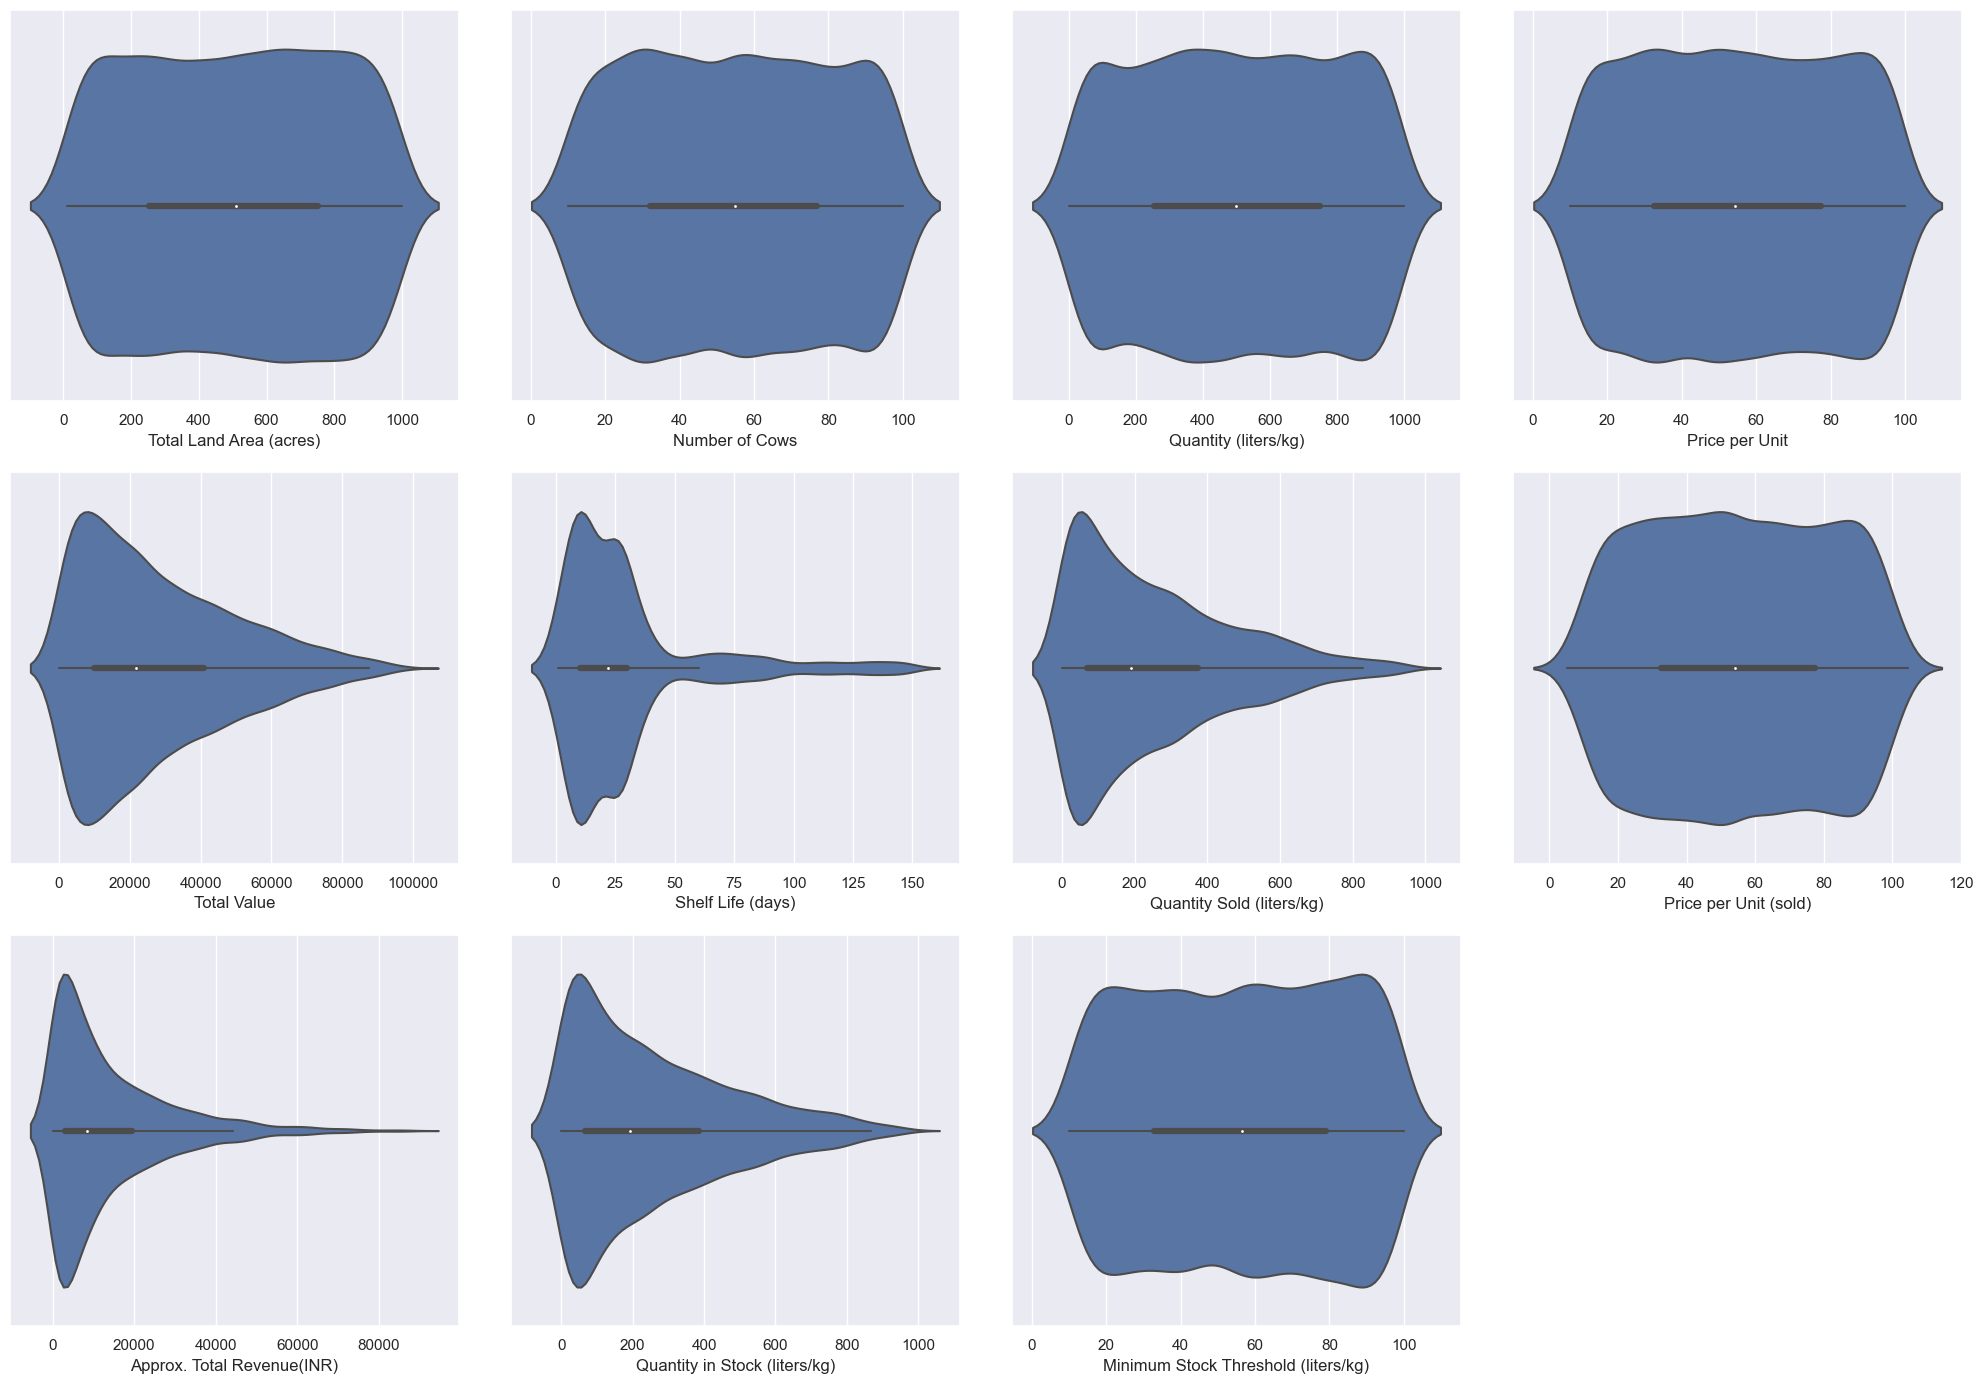

In [ ]:
# list of numerical variables to plot
num_vars = ['Total Land Area (acres)', 'Number of Cows', 'Quantity (liters/kg)', 'Price per Unit',
            'Total Value', 'Shelf Life (days)', 'Quantity Sold (liters/kg)', 'Price per Unit (sold)',
            'Approx. Total Revenue(INR)', 'Quantity in Stock (liters/kg)', 'Minimum Stock Threshold (liters/kg)']

# create figure with subplots
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20, 14))
axs = axs.flatten()

# create violinplot for each numerical variable
for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df, ax=axs[i])

# adjust spacing between subplots
fig.tight_layout()

# remove the 12th subplot
fig.delaxes(axs[11])

plt.show()

# Data Preprocessing Part 2

In [ ]:
df.head()

,Location,Total Land Area (acres),Number of Cows,Farm Size,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,Total Value,Shelf Life (days),Storage Condition,Production Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,Telangana,310.84,96,Medium,5,Ice Cream,Dodla Dairy,222.40,85.72,19064.1280,25,Frozen,2021-12-27,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
1,Uttar Pradesh,19.19,44,Large,1,Milk,Amul,687.48,42.61,29293.5228,22,Tetra Pack,2021-10-03,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10
2,Tamil Nadu,581.69,24,Medium,4,Yogurt,Dodla Dairy,503.48,36.50,18377.0200,30,Refrigerated,2022-01-14,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83
3,Telangana,908.00,89,Small,3,Cheese,Britannia Industries,823.36,26.52,21835.5072,72,Frozen,2019-05-15,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68
4,Maharashtra,861.95,21,Medium,8,Buttermilk,Mother Dairy,147.77,83.85,12390.5145,11,Refrigerated,2020-10-17,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40


In [ ]:
# Remove Unnecesary column / attribute
df.drop(columns=['Product ID', 'Production Date'], inplace=True)

In [ ]:
df.shape

(4325, 19)

In [ ]:
#Check missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

# Label Encoding each Object datatypes

In [ ]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

Location: ['Telangana' 'Uttar Pradesh' 'Tamil Nadu' 'Maharashtra' 'Karnataka'
 'Bihar' 'West Bengal' 'Madhya Pradesh' 'Chandigarh' 'Delhi' 'Gujarat'
 'Kerala' 'Jharkhand' 'Rajasthan' 'Haryana']
Farm Size: ['Medium' 'Large' 'Small']
Product Name: ['Ice Cream' 'Milk' 'Yogurt' 'Cheese' 'Buttermilk' 'Curd' 'Paneer' 'Lassi'
 'Ghee' 'Butter']
Brand: ['Dodla Dairy' 'Amul' 'Britannia Industries' 'Mother Dairy' 'Raj'
 'Dynamix Dairies' 'Sudha' 'Passion Cheese' 'Warana' 'Palle2patnam'
 'Parag Milk Foods']
Storage Condition: ['Frozen' 'Tetra Pack' 'Refrigerated' 'Polythene Packet' 'Ambient']
Customer Location: ['Madhya Pradesh' 'Kerala' 'Rajasthan' 'Jharkhand' 'Gujarat' 'Karnataka'
 'Haryana' 'Tamil Nadu' 'West Bengal' 'Telangana' 'Chandigarh'
 'Maharashtra' 'Delhi' 'Bihar' 'Uttar Pradesh']
Sales Channel: ['Wholesale' 'Online' 'Retail']


In [ ]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()

    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())

    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])

    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

Location: [12 13 11  9  6  0 14  8  1  2  3  7  5 10  4]
Farm Size: [1 0 2]
Product Name: [5 7 9 2 1 3 8 6 4 0]
Brand: [ 2  0  1  4  8  3  9  7 10  5  6]
Storage Condition: [1 4 3 2 0]
Customer Location: [ 8  7 10  5  3  6  4 11 14 12  1  9  2  0 13]
Sales Channel: [2 0 1]


# Correlation Heatmap

<AxesSubplot:>

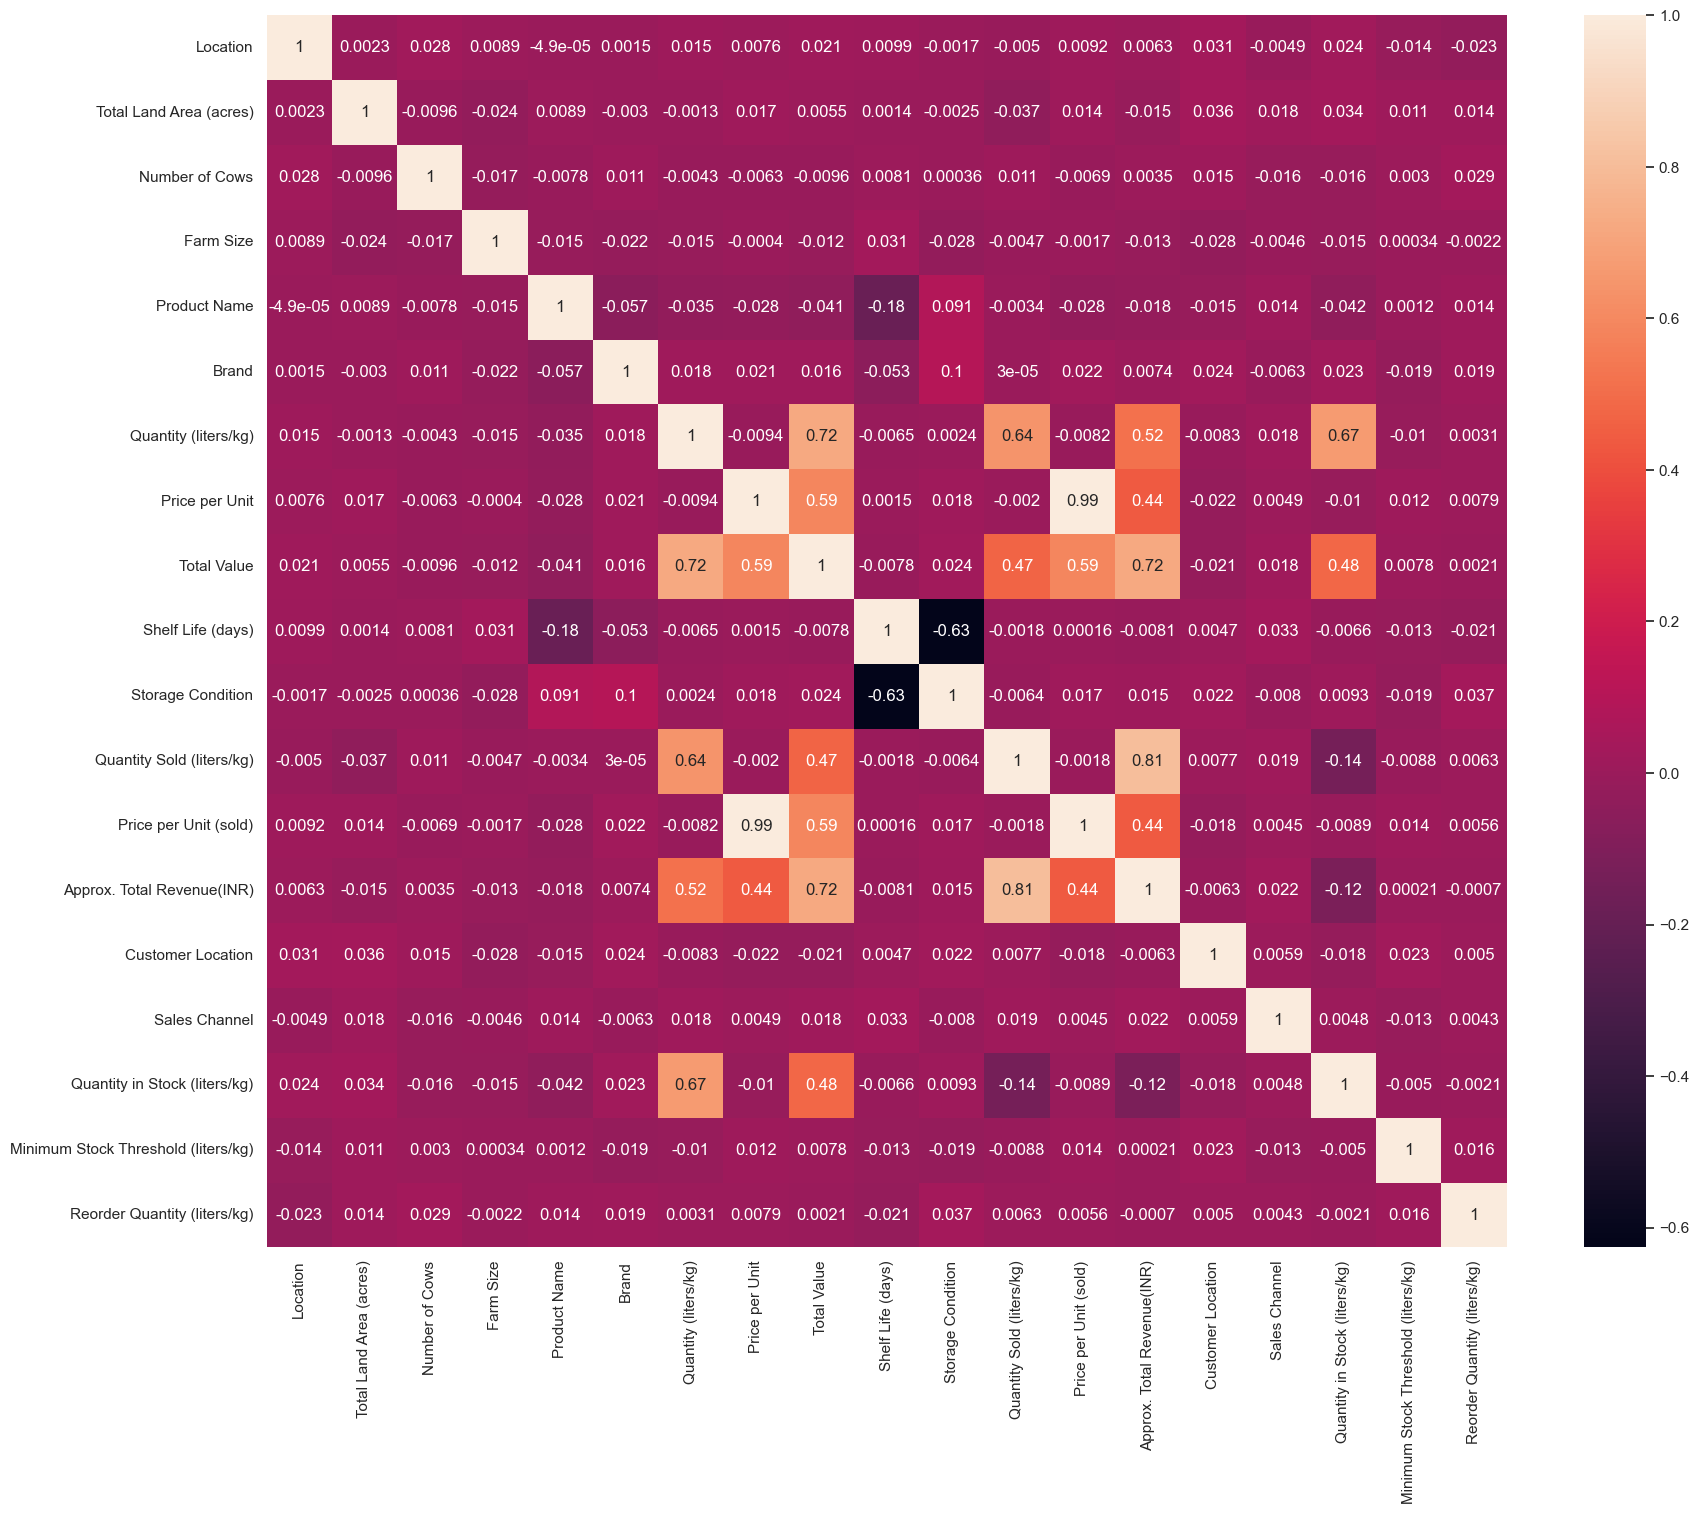

In [ ]:
#Correlation Heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

# Train Test Split

In [ ]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Reorder Quantity (liters/kg)', axis=1), df['Reorder Quantity (liters/kg)'], test_size=0.2, random_state=0)

# Remove Train Data Outlier Using IQR

In [ ]:
# Concatenate X_train and y_train for outlier removal
train_df = pd.concat([X_train, y_train], axis=1)

# Calculate the IQR values for each column
Q1 = train_df.quantile(0.25)
Q3 = train_df.quantile(0.75)
IQR = Q3 - Q1

# Remove outliers from X_train
train_df = train_df[~((train_df < (Q1 - 1.5 * IQR)) | (train_df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Separate X_train and y_train after outlier removal
X_train = train_df.drop('Reorder Quantity (liters/kg)', axis=1)
y_train = train_df['Reorder Quantity (liters/kg)']

# Decision Tree Regressor

In [ ]:
# Create a DecisionTreeRegressor object
dtree = DecisionTreeRegressor()

# Define the hyperparameters to tune and their values
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state': [0,42]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42}


In [ ]:
dtree = DecisionTreeRegressor(random_state=42, max_depth=2, max_features='sqrt', min_samples_leaf=1, min_samples_split=2)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, max_features='sqrt', random_state=42)

In [ ]:
y_pred = dtree.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 44.96403721244464
MAPE is 0.6818198463108295
MSE is 2714.630434875525
R2 score is -0.010652761493847862
RMSE score is 52.10211545489804


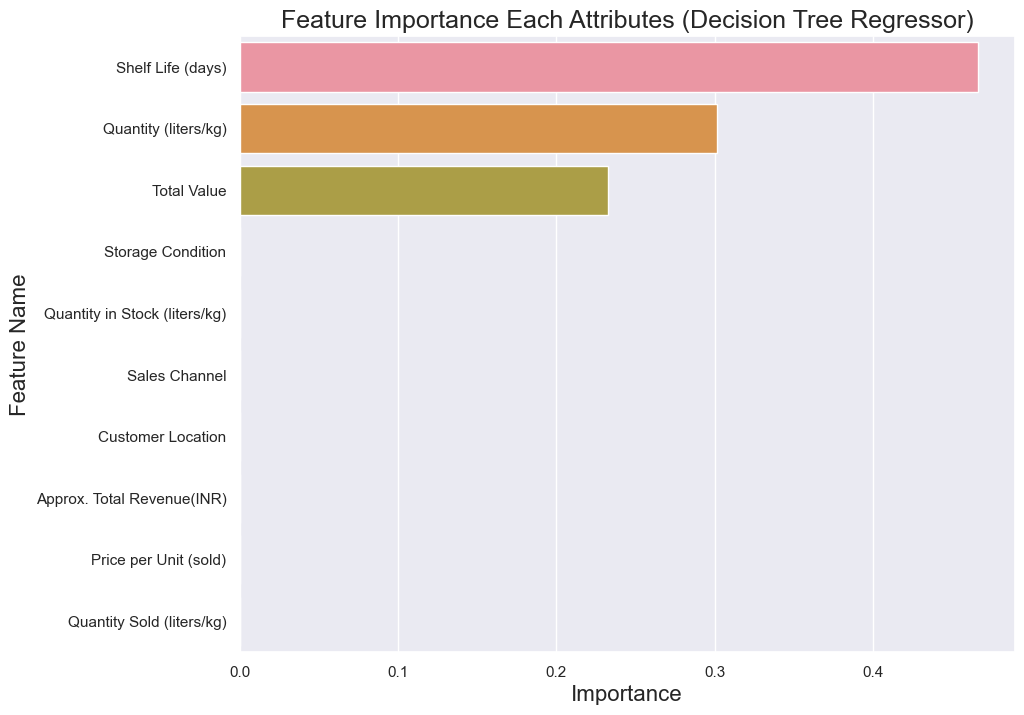

In [ ]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Decision Tree Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

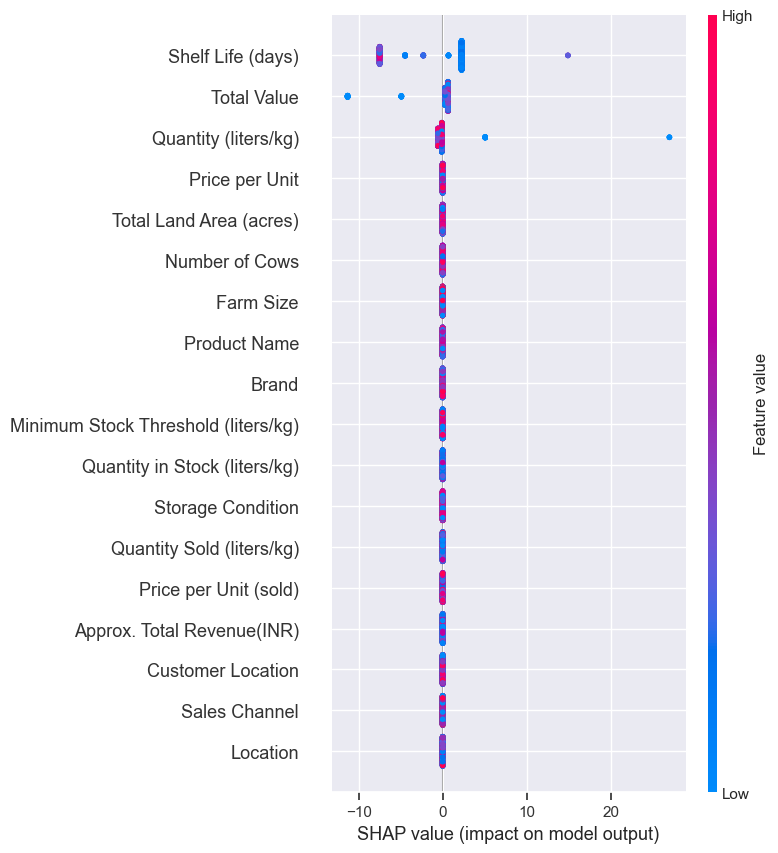

In [ ]:
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

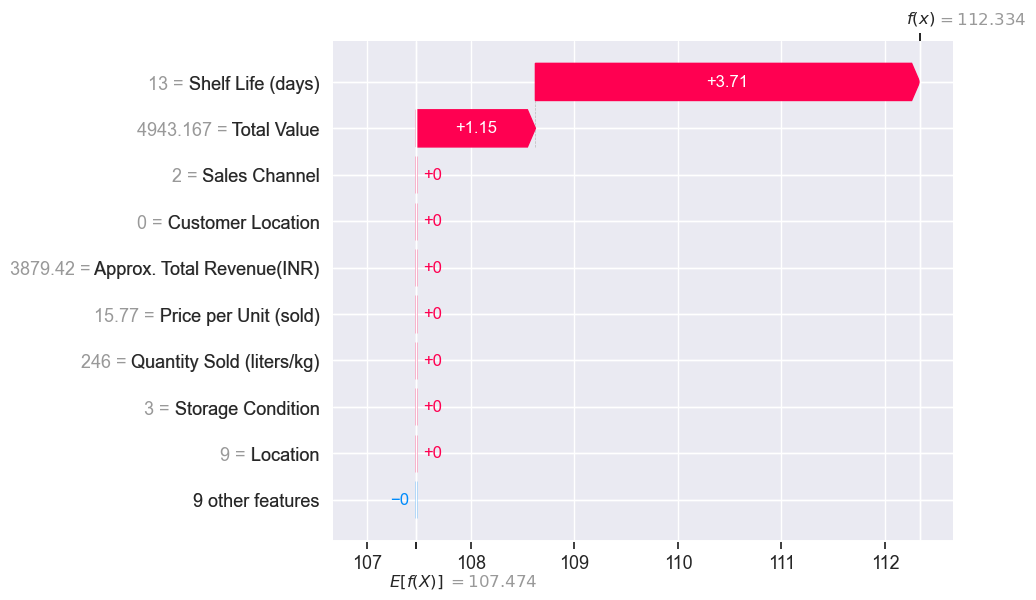

In [ ]:
explainer = shap.Explainer(dtree, X_test, check_additivity=False)
shap_values = explainer(X_test, check_additivity=False)
shap.plots.waterfall(shap_values[0])

# Random Forest Regressor

In [ ]:
# Create a Random Forest Regressor object
rf = RandomForestRegressor()

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'random_state': [0,42]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 0}


In [ ]:
rf = RandomForestRegressor(random_state=0, max_depth=3, min_samples_split=2, min_samples_leaf=2,
                           max_features='sqrt')
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, max_features='sqrt', min_samples_leaf=2,
                      random_state=0)

In [ ]:
y_pred = rf.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 44.81831149698112
MAPE is 0.6843108868886055
MSE is 2687.1962997387245
R2 score is -0.0004390749164797647
RMSE score is 51.83817415514096


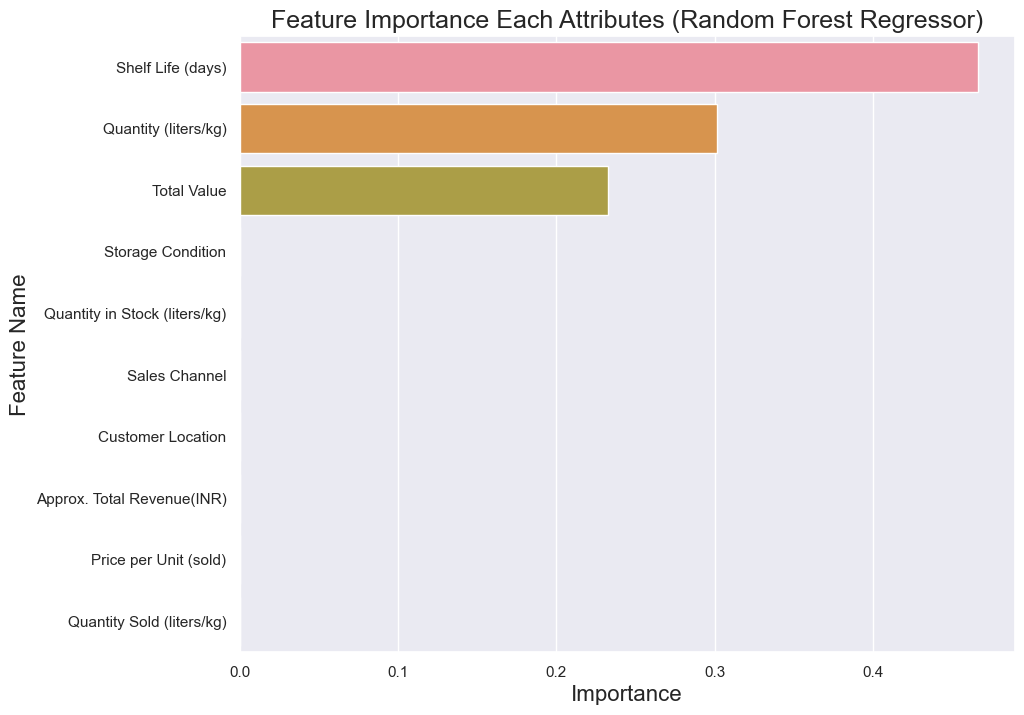

In [ ]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Random Forest Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

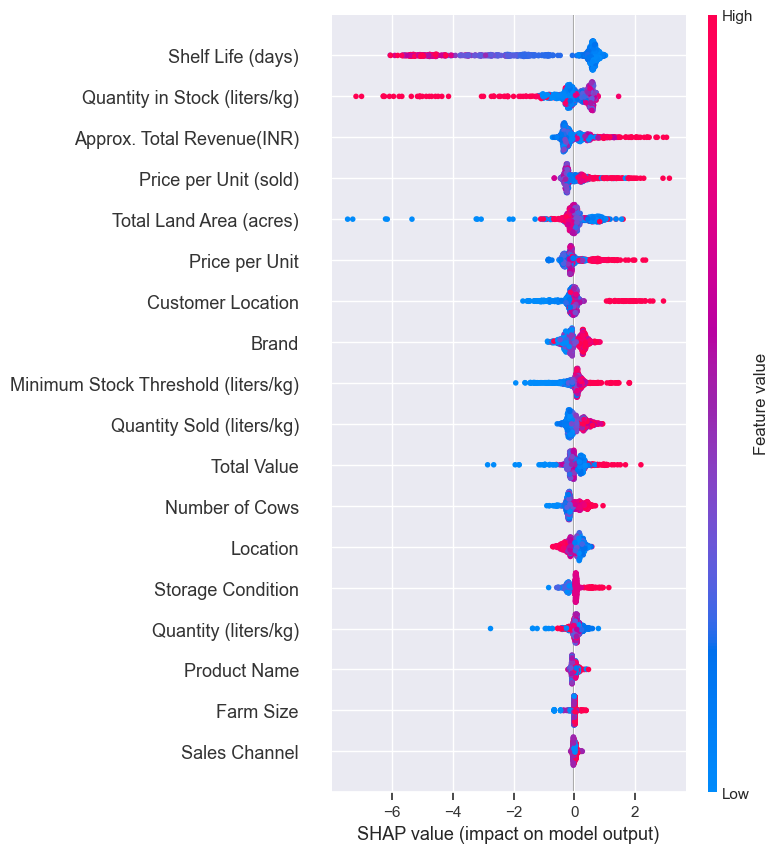

In [ ]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

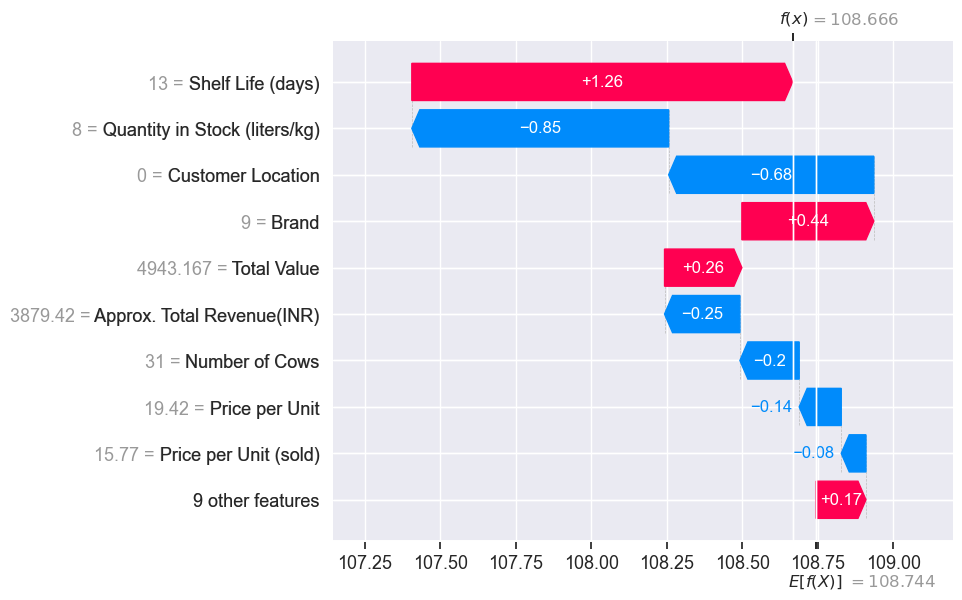

In [ ]:
explainer = shap.Explainer(rf, X_test, check_additivity=False)
shap_values = explainer(X_test, check_additivity=False)
shap.plots.waterfall(shap_values[0])